In [3]:
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y analisis de datos
import seaborn as sns # creacion de graficas estadisticas
import matplotlib.pyplot as plt # creacion grafica en dos dimenciones

# librerias para implementar modelos de ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.linear_model import LinearRegression # libreria para regresion lineal
from sklearn.metrics import classification_report, confusion_matrix

#lectura de datos en python y se carga en la variable datos
Datos = pd.read_csv('./Titanic-Dataset.csv')



In [4]:
#lectura de los datos para analisis exploratorio de los datos
Datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#descripcion de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de datos atipicos y faltantes')

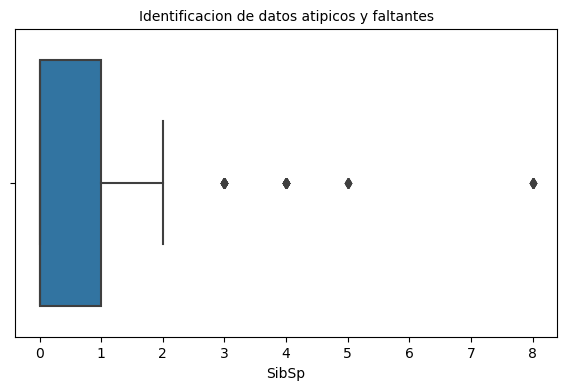

In [14]:
# identificacion de datos atipicos y faltantes
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificacion de datos atipicos y faltantes', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos atipicos y faltantes')

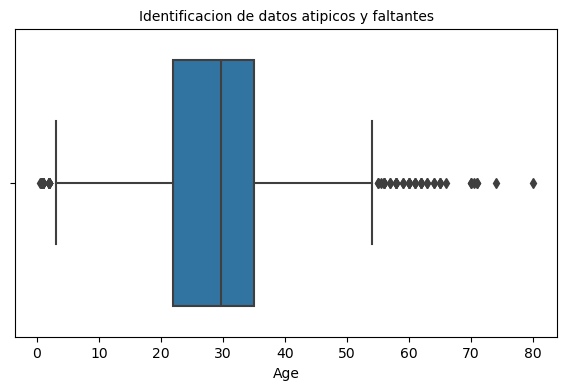

In [13]:
# identificacion de datos atipicos y faltantes
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos atipicos y faltantes', fontsize=10)

In [9]:
#Procesamiento de los datos limpiandolos, tratando los valores faltantes y transformandolos

print("Cantidad de registros con NaN en Survived: ", Datos['Survived'].isna().sum())
print("Cantidad de registros con NaN en Pclass: ", Datos['Pclass'].isna().sum())
print("Cantidad de registros con NaN en Name: ", Datos['Name'].isna().sum())
print("Cantidad de registros con NaN en Sex: ", Datos['Sex'].isna().sum())
print("Cantidad de registros con NaN en Age: ", Datos['Age'].isna().sum())
print("Cantidad de registros con NaN en SibSp: ", Datos['SibSp'].isna().sum())
print("Cantidad de registros con NaN en Parch: ", Datos['Parch'].isna().sum())
print("Cantidad de registros con NaN en Ticket: ", Datos['Ticket'].isna().sum())
print("Cantidad de registros con NaN en Fare: ", Datos['Fare'].isna().sum())
print("Cantidad de registros con NaN en Cabin: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros con NaN en Embarked: ", Datos['Embarked'].isna().sum())

Cantidad de registros con NaN en Survived:  0
Cantidad de registros con NaN en Pclass:  0
Cantidad de registros con NaN en Name:  0
Cantidad de registros con NaN en Sex:  0
Cantidad de registros con NaN en Age:  177
Cantidad de registros con NaN en SibSp:  0
Cantidad de registros con NaN en Parch:  0
Cantidad de registros con NaN en Ticket:  0
Cantidad de registros con NaN en Fare:  0
Cantidad de registros con NaN en Cabin:  687
Cantidad de registros con NaN en Embarked:  2


In [10]:
#reemplazar todos los ceros con el valor medio 
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())
Datos['Cabin'] = Datos['Cabin'].fillna('C103')
Datos['Embarked'] = Datos['Embarked'].fillna('S')

In [11]:
print("Cantidad de registros con NaN en Age: ", Datos['Age'].isna().sum())
print("Cantidad de registros con NaN en Cabin: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros con NaN en Embarked: ", Datos['Embarked'].isna().sum())

Cantidad de registros con NaN en Age:  0
Cantidad de registros con NaN en Cabin:  0
Cantidad de registros con NaN en Embarked:  0


Text(0.5, 1.0, 'Identificacion de los datos atipicos')

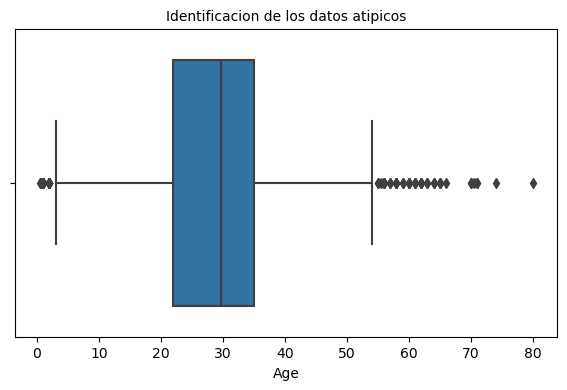

In [12]:
#identificacion de los datos atipicos
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de los datos atipicos', fontsize=10)

In [15]:
nivel_minimo=5
nivel_maximo=78
total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 41


In [16]:
#filtrar datos atipicos, es decir que solo me deje los que estan entre 5 y 80
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [17]:
# comprovar que se hayan removido los datos atipicos
total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_Atipicos))

El total de datos atipicos es 0


In [18]:
#revision de tipo de datos y de datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  846 non-null    int64  
 1   Survived     846 non-null    int64  
 2   Pclass       846 non-null    int64  
 3   Name         846 non-null    object 
 4   Sex          846 non-null    object 
 5   Age          846 non-null    float64
 6   SibSp        846 non-null    int64  
 7   Parch        846 non-null    int64  
 8   Ticket       846 non-null    object 
 9   Fare         846 non-null    float64
 10  Cabin        846 non-null    object 
 11  Embarked     846 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


In [ ]:
# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de característica
# la variable objetivo es si sobrevivio o no 

In [19]:
#total de personas que sobrevivieron, es decir 0 es no y 1 si sobrevivio
Datos['Survived'].value_counts()

Survived
0    536
1    310
Name: count, dtype: int64

In [20]:
Datos[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
8,1
9,1
11,1


In [21]:
#Dividir el dataset en Train y Test para evaluar correctamente el modelo.
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y variable objetivo (Y)
X = Datos.drop('Survived', axis=1)
Y = Datos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba sin estratificación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [22]:
print(X_train)

     PassengerId  Pclass                                            Name  \
132          133       3  Robins, Mrs. Alexander A (Grace Charity Laury)   
579          580       3                             Jussila, Mr. Eiriik   
303          304       2                             Keane, Miss. Nora A   
37            38       3                        Cann, Mr. Ernest Charles   
384          385       3                          Plotcharsky, Mr. Vasil   
..           ...     ...                                             ...   
880          881       2    Shelley, Mrs. William (Imanita Parrish Hall)   
207          208       3                     Albimona, Mr. Nassef Cassem   
663          664       3                                Coleff, Mr. Peju   
589          590       3                             Murdlin, Mr. Joseph   
719          720       3                    Johnson, Mr. Malkolm Joackim   

        Sex        Age  SibSp  Parch             Ticket     Fare Cabin  \
132  female  

In [23]:
print (Y_train)

132    0
579    1
303    1
37     0
384    0
      ..
880    1
207    1
663    0
589    0
719    0
Name: Survived, Length: 634, dtype: int64


In [24]:
#Entrenar el modelo configurando los diferentes hiperparámetros.
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
modelo_regresion = LinearRegression()

# Codificar características categóricas usando One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Alinear las columnas en los conjuntos de entrenamiento y prueba
X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Entrenar el modelo
modelo_regresion.fit(X_train_aligned, Y_train)

# Crear la predicción
Prediccion = modelo_regresion.predict(X_test_aligned)

In [25]:
print (Y_test)

536    0
238    0
646    0
767    0
696    0
      ..
787    0
56     1
403    0
329    1
325    1
Name: Survived, Length: 212, dtype: int64


In [26]:
print (Prediccion)

[ 0.35188838  0.2216846   0.10151667  0.6017145   0.03137848  0.29639592
  0.4496824  -0.00205523  0.06500903  0.10724819  0.15785392  0.0719144
  0.11553132  0.11210889  1.03358834  0.06641086  0.09788046  0.70754444
  0.07567343  0.09134315  0.54125855  0.07032128  0.19019745  0.07326132
  0.07955295  0.10512756  0.90081858  0.1559161   0.20862097  0.69090418
  0.41561885  0.24347994  0.57434749  0.79062659  0.64653371  0.62433782
  0.78222468  1.02852912  0.08243613  0.6632628   0.75364996  0.10274411
  0.37508454  0.16111084  0.13992006  0.10075976  0.15489872  0.66551794
 -0.16993482  0.20186782  0.1148918   0.23012848  0.07321592  0.66323755
  0.6196391   0.35799732  0.07301558  0.76985415  0.59803504  0.42798025
  0.27702796  0.58380426  0.09254526  0.60464655  0.05630225  0.17628765
  0.10292887  0.02089509  0.00564805  0.08870884  0.99739097  0.35733362
  0.0677244   0.1758183   0.41167833  0.16319995  1.34532276  0.09788869
  0.39302327  0.33754645  0.11425621  0.79922938  0.

In [27]:
#Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Establecer un umbral para convertir el problema a clasificación binaria
umbral = 0.5

# Convertir los valores continuos a etiquetas binarias
Y_test_binario = [1 if y >= umbral else 0 for y in Y_test]
Prediccion_binaria = [1 if y >= umbral else 0 for y in Prediccion]

# Calcular las métricas
accuracy = accuracy_score(Y_test_binario, Prediccion_binaria)
precision = precision_score(Y_test_binario, Prediccion_binaria)
recall = recall_score(Y_test_binario, Prediccion_binaria)
f1 = f1_score(Y_test_binario, Prediccion_binaria)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8349056603773585
Precision: 0.8133333333333334
Recall: 0.7439024390243902
F1-score: 0.7770700636942677


In [ ]:
#Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


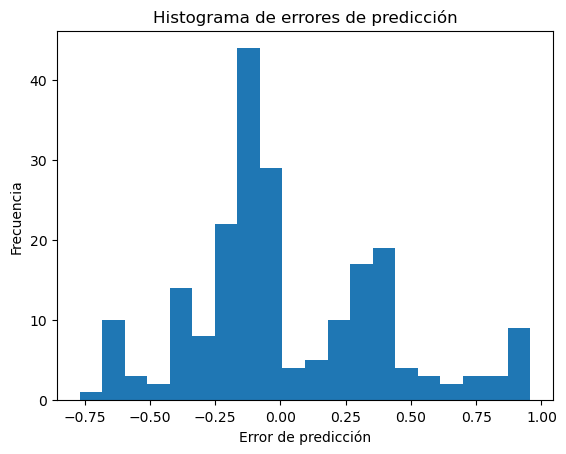

In [30]:
import matplotlib.pyplot as plt

errores = Y_test - Prediccion
plt.hist(errores, bins=20)
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.title("Histograma de errores de predicción")
plt.show()

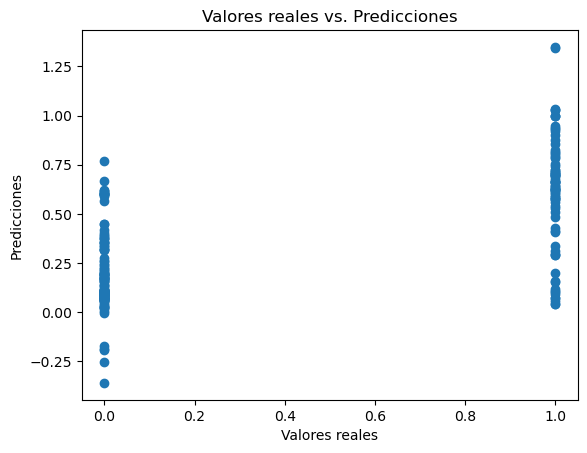

In [31]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()